In [1]:
#Put all imports here
import numpy as np
import matplotlib.pyplot as plt
#from copy import deepcopy
#import pickle
import os
import sys
#import cv2
import torch
import csv

In [3]:
#every path should start from the project folder:
project_folder = "../"

#Config folder should contain hyperparameters configurations
cfg_folder = os.path.join(project_folder,"cfg")

#Data folder should contain raw and preprocessed data
data_folder = os.path.join(project_folder,"data")
raw_data_folder = os.path.join(data_folder,"raw")
processed_data_folder = os.path.join(data_folder,"processed")

#Source folder should contain all the (essential) source code
source_folder = os.path.join(project_folder,"src")

#The out folder should contain all outputs: models, results, plots, etc.
out_folder = os.path.join(project_folder,"out")
img_folder = os.path.join(out_folder,"img")

In [4]:
matrix_path = os.path.join(processed_data_folder,"utility_matrix.csv")
utility_matrix = np.loadtxt(matrix_path, delimiter=',')

print(utility_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_utility_matrix = utility_matrix[1:,1:]/5
utility_matrix_scaled = scaler.fit_transform(utility_matrix)
utility_matrix_scaled

array([[ 0.        , -0.58466956, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ],
       [ 0.        ,  2.06737188, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ],
       [ 0.        , -0.58466956, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ],
       ...,
       [ 0.        , -0.58466956, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ],
       [ 0.        , -0.58466956, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ],
       [ 0.        , -0.58466956, -0.27499842, ..., -0.05580318,
        -0.06282959, -0.1859856 ]])

In [6]:
U, S, V_t = np.linalg.svd(utility_matrix_scaled)

## ENERGY

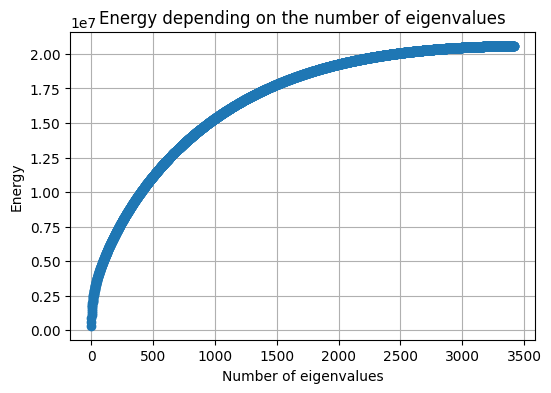

In [7]:
from kneed import KneeLocator

cumulative_energies = np.cumsum(S ** 2, axis=0)

total_energy = cumulative_energies[-1]
normalized_cumulative_energies = cumulative_energies / total_energy

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(S) + 1), cumulative_energies, marker='o', linestyle='-')
plt.xlabel('Number of eigenvalues')
plt.ylabel('Energy')
plt.title('Energy depending on the number of eigenvalues')
plt.grid(True)
plt.show()

In [8]:
knee_locator = KneeLocator(range(1, len(S) + 1), cumulative_energies, direction='increasing')
elbow_point = knee_locator.elbow

print(f'The elbow point is at component number: {elbow_point}')

The elbow point is at component number: 1061


## KMEANS

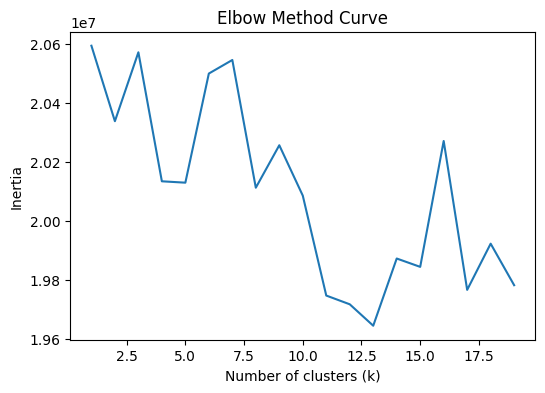

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k,max_iter=100,n_init="auto")
    kmeans.fit(utility_matrix_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia_values)
plt.title('Elbow Method Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [10]:
knee_locator_kmeans = KneeLocator(range(1, 20), inertia_values, direction='decreasing')
elbow_point_kmeans = knee_locator_kmeans.elbow

print(f'The elbow point is at component number: {elbow_point_kmeans}')

The elbow point is at component number: 18
